# SECTION I

## 1-Demarer une session Spark

In [0]:
# Importer les bibliothèques nécessaires
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder \
    .appName("glezor") \
    .getOrCreate()

# Afficher les informations sur la session Spark
print(spark)

## 2-Veifier si le jeu de données à été bien importé

In [0]:
# Lister les fichiers dans le répertoire FileStore/tables pour vérifier si le fichier est bien là
display(dbutils.fs.ls("dbfs:/FileStore/tables/"))


path,name,size,modificationTime
dbfs:/FileStore/tables/Feuille_de_calcul_sans_titre-1.xlsx,Feuille_de_calcul_sans_titre-1.xlsx,8620,1714779328000
dbfs:/FileStore/tables/Feuille_de_calcul_sans_titre.xlsx,Feuille_de_calcul_sans_titre.xlsx,8620,1714778963000
dbfs:/FileStore/tables/Feuille_de_calcul_sans_titre___Feuille_1.csv,Feuille_de_calcul_sans_titre___Feuille_1.csv,3362,1714779783000
dbfs:/FileStore/tables/base_c.csv,base_c.csv,379285991,1717716864000
dbfs:/FileStore/tables/clients-1.csv,clients-1.csv,9042615,1715016690000
dbfs:/FileStore/tables/clients-2.csv,clients-2.csv,9042615,1715023875000
dbfs:/FileStore/tables/clients.csv,clients.csv,9042615,1714657233000
dbfs:/FileStore/tables/commerciaux-1.csv,commerciaux-1.csv,25358,1715016617000
dbfs:/FileStore/tables/commerciaux-2.csv,commerciaux-2.csv,25358,1715023748000
dbfs:/FileStore/tables/commerciaux.csv,commerciaux.csv,25358,1714655981000


## 3-Nombre lignes et colonnes

In [0]:
# Nombre de lignes
nombre_lignes = df.count()

# Nombre de colonnes
nombre_colonnes = len(df.columns)

# Affichage des résultats
print(f"Nombre de lignes : {nombre_lignes}")
print(f"Nombre de colonnes : {nombre_colonnes}")


Nombre de lignes : 3250000
Nombre de colonnes : 18


## 4-Description statistique des variables:

In [0]:
# Importer les bibliothèques nécessaires
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder \
    .appName("LectureCSV") \
    .getOrCreate()

# Lire le fichier CSV depuis l'emplacement correct dans DBFS
df = spark.read.csv("dbfs:/FileStore/tables/base_c.csv", header=True, inferSchema=True)

# Afficher le schéma du DataFrame
df.printSchema()

# Afficher les premières lignes du DataFrame
df.show()

root
 |-- id: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- country: string (nullable = true)
 |-- diagnosis_date: date (nullable = true)
 |-- cancer_stage: string (nullable = true)
 |-- beginning_of_treatment_date: date (nullable = true)
 |-- family_history: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- cholesterol_level: integer (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- asthma: integer (nullable = true)
 |-- cirrhosis: integer (nullable = true)
 |-- other_cancer: integer (nullable = true)
 |-- treatment_type: string (nullable = true)
 |-- end_treatment_date: date (nullable = true)
 |-- survived: integer (nullable = true)

+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+-

In [0]:
df.show(10, truncate=False)


+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|id |age |gender|country       |diagnosis_date|cancer_stage|beginning_of_treatment_date|family_history|smoking_status|bmi |cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|1  |64.0|Female|Germany       |2016-04-07    |Stage III   |2016-04-21                 |No            |Never Smoked  |31.1|257              |1           |1     |0        |0           |Combined      |2017-11-15        |0       |
|2  |50.0|Male  |Czech Republic|2023-04-22    |Stage III   |2023-05-02                 |

In [0]:
df.describe().show()


+-------+-----------------+-----------------+-------+-------+------------+--------------+--------------+------------------+-----------------+-------------------+-------------------+-------------------+-------------------+--------------+------------------+
|summary|               id|              age| gender|country|cancer_stage|family_history|smoking_status|               bmi|cholesterol_level|       hypertension|             asthma|          cirrhosis|       other_cancer|treatment_type|          survived|
+-------+-----------------+-----------------+-------+-------+------------+--------------+--------------+------------------+-----------------+-------------------+-------------------+-------------------+-------------------+--------------+------------------+
|  count|          3250000|          3250000|3250000|3250000|     3250000|       3250000|       3250000|           3250000|          3250000|            3250000|            3250000|            3250000|            3250000|       3250

## 5- Verification des données manquantes

In [0]:
# Importer les bibliothèques nécessaires
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum

# Créer une session Spark
spark = SparkSession.builder \
    .appName("AnalyseDesDonnees") \
    .getOrCreate()

# Lire le fichier CSV depuis DBFS
df = spark.read.csv("dbfs:/FileStore/tables/base_c.csv", header=True, inferSchema=True)

# Afficher les premières lignes du DataFrame
print("Affichage des premières lignes du DataFrame :")
df.show(10, truncate=False)

# Afficher un résumé statistique des colonnes numériques
print("Résumé statistique des colonnes numériques :")
df.describe().show()

# Vérifier les valeurs manquantes
print("Vérification des valeurs manquantes :")
missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

# Fermer la session Spark
#spark.stop()



Affichage des premières lignes du DataFrame :
+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|id |age |gender|country       |diagnosis_date|cancer_stage|beginning_of_treatment_date|family_history|smoking_status|bmi |cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|1  |64.0|Female|Germany       |2016-04-07    |Stage III   |2016-04-21                 |No            |Never Smoked  |31.1|257              |1           |1     |0        |0           |Combined      |2017-11-15        |0       |
|2  |50.0|Male  |Czech Republic|2023-04-22

Il n'y a aucune valeur manquante dans le jeu de données. Toutes les colonnes ont zéro valeur manquante, ce qui signifie que les données sont complètes.
Conclusion

Le jeu de données est complet avec aucune valeur manquante.

L'âge moyen des patients est de 55 ans avec un IMC moyen de 30.5, et un taux de cholestérol moyen de 233.

La majorité des patients souffrent d'hypertension et une minorité survit.

Le jeu de données semble bien structuré et prêt pour une analyse plus approfondie ou une modélisation prédictive.

## 6- Description graphique des variables

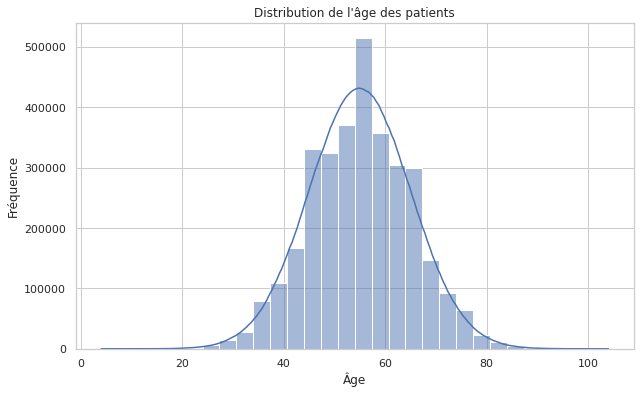

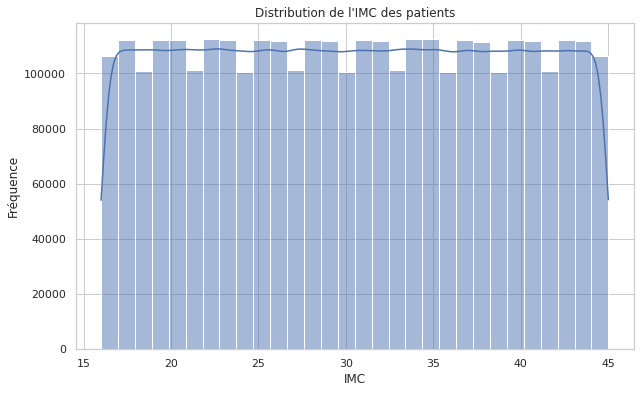

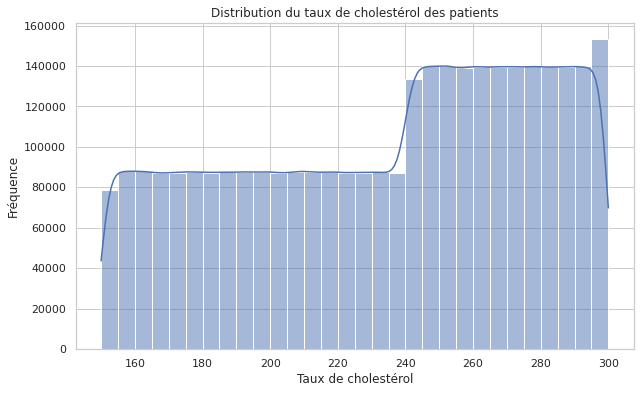

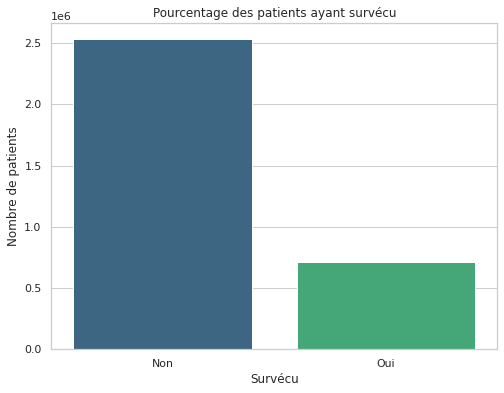

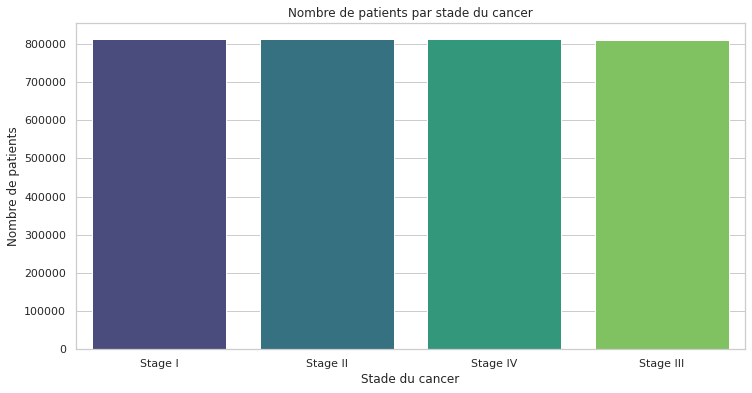

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir le DataFrame Spark en DataFrame Pandas
pdf = df.toPandas()

# Définir le style des graphiques
sns.set(style="whitegrid")

# 1. Distribution de l'âge des patients
plt.figure(figsize=(10, 6))
sns.histplot(pdf['age'], bins=30, kde=True)
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# 2. Distribution de l'IMC des patients
plt.figure(figsize=(10, 6))
sns.histplot(pdf['bmi'], bins=30, kde=True)
plt.title("Distribution de l'IMC des patients")
plt.xlabel("IMC")
plt.ylabel("Fréquence")
plt.show()

# 3. Distribution du taux de cholestérol des patients
plt.figure(figsize=(10, 6))
sns.histplot(pdf['cholesterol_level'], bins=30, kde=True)
plt.title("Distribution du taux de cholestérol des patients")
plt.xlabel("Taux de cholestérol")
plt.ylabel("Fréquence")
plt.show()

# 4. Pourcentage des patients ayant survécu
plt.figure(figsize=(8, 6))
survived_counts = pdf['survived'].value_counts()
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette="viridis")
plt.title("Pourcentage des patients ayant survécu")
plt.xlabel("Survécu")
plt.ylabel("Nombre de patients")
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

# 5. Nombre de patients par stade du cancer
plt.figure(figsize=(12, 6))
cancer_stage_counts = pdf['cancer_stage'].value_counts()
sns.barplot(x=cancer_stage_counts.index, y=cancer_stage_counts.values, palette="viridis")
plt.title("Nombre de patients par stade du cancer")
plt.xlabel("Stade du cancer")
plt.ylabel("Nombre de patients")
plt.show()


### Distribution de l'âge  des patients
Âge moyen des patients : La distribution étant centrée autour de 60 ans, l'âge moyen des patients est probablement autour de cette valeur.

Variabilité : La courbe montre que la majorité des patients ont un âge qui varie entre environ 40 et 80 ans.

Concentration : La plus grande concentration de patients est autour de 60 ans.

La distribution de l'âge des patients montre une concentration importante autour de 60 ans, avec une distribution symétrique qui suit une courbe normale. Cela peut indiquer que la plupart des patients dans cet ensemble de données sont d'âge moyen à légèrement avancé.

### Distribution de l'IMC des patients


###Distribution du taux de  cholestérol des patients

### Pourcentage des patients ayants survecu

Nombre de patients n'ayant pas survécu : Environ 2,5 millions.

Nombre de patients ayant survécu : Environ 0,5 million.


La majorité des patients représentés dans ce graphique n'ont pas survécu, avec un nombre de patients décédés étant environ cinq fois supérieur à celui des patients ayant survécu.

### Nombre de patients par satde du cancer

# Problématique 1: Impact des comorbidités et du statut tabagique sur la survie

### Modèle proposé : Random Forest Classifier 
Le Random Forest est un modèle  basé sur de multiples arbres de décision. Il est particulièrement utile pour des problèmes où l'importance relative des différentes caractéristiques (comme les comorbidités et le statut tabagique) doit être évaluée.

In [0]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Indexation des colonnes catégorielles
indexers = [
    StringIndexer(inputCol="smoking_status", outputCol="smoking_status_index"),
    StringIndexer(inputCol="hypertension", outputCol="hypertension_index"),
    StringIndexer(inputCol="asthma", outputCol="asthma_index"),
    StringIndexer(inputCol="cirrhosis", outputCol="cirrhosis_index"),
    StringIndexer(inputCol="other_cancer", outputCol="other_cancer_index"),
    StringIndexer(inputCol="survived", outputCol="label")
]

# Assemblage des colonnes de caractéristiques
assembler = VectorAssembler(
    inputCols=[
        "age", "bmi", "cholesterol_level",
        "smoking_status_index", "hypertension_index", "asthma_index",
        "cirrhosis_index", "other_cancer_index"
    ], 
    outputCol="features"
)

# Définir le modèle Random Forest
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=100)

# Création du pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Division des données en ensembles d'entraînement et de test
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Entraîner le modèle
model = pipeline.fit(train_data)

# Faire des prédictions
predictions = model.transform(test_data)

# Évaluation du modèle
evaluator = BinaryClassificationEvaluator(labelCol="label")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

# Afficher les prédictions
predictions.select("label", "prediction", "probability").show(truncate=False)


AUC: 0.5022613067942878
+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|0.0  |0.0       |[0.7805260312652399,0.2194739687347602] |
|0.0  |0.0       |[0.7807015152507001,0.21929848474929983]|
|0.0  |0.0       |[0.7804503175615322,0.21954968243846787]|
|0.0  |0.0       |[0.7805114058472027,0.21948859415279726]|
|0.0  |0.0       |[0.7804553443546333,0.21954465564536674]|
|0.0  |0.0       |[0.7804612355051528,0.21953876449484722]|
|1.0  |0.0       |[0.7805330466604011,0.2194669533395989] |
|0.0  |0.0       |[0.7805330466604011,0.2194669533395989] |
|0.0  |0.0       |[0.7804765094591647,0.2195234905408353] |
|1.0  |0.0       |[0.7804119377199479,0.21958806228005204]|
|1.0  |0.0       |[0.780446208478622,0.21955379152137808] |
|0.0  |0.0       |[0.7804311656695141,0.21956883433048588]|
|0.0  |0.0       |[0.7804573575671467,0.2195426424328533] |
|0.0  |0.0      

### Interprétation :

Précision faible : Le modèle a souvent prédit la classe 0 (non survécu) avec une probabilité assez élevée, même pour des échantillons où le label réel est 1 (survécu). Cela indique un biais du modèle vers la classe majoritaire.

Probabilités biaisées : Les probabilités prédictives sont généralement élevées pour la classe 0 et basses pour la classe 1, ce qui montre une mauvaise calibration du modèle.


##Conclusion

Les résultats montrent que le modèle actuel (probablement la régression logistique ou un autre modèle simple) ne parvient pas à prédire correctement la survie des patients. Quelques pistes pour améliorer la performance :

Rééquilibrer les données : Si la classe des survivants est sous-représentée, un rééquilibrage (par sur-échantillonnage ou sous-échantillonnage) pourrait aider.

Complexité du modèle : Utiliser un modèle plus complexe comme le Random Forest ou le Gradient Boosted Trees pourrait capturer des relations plus complexes dans les données.

Caractéristiques supplémentaires : Ajouter ou transformer des caractéristiques pour mieux capturer les informations pertinentes pour la survie.
Validation croisée : Utiliser la validation croisée pour évaluer et affiner les hyperparamètres du modèle.


Ces ajustements peuvent potentiellement améliorer la performance du modèle et sa capacité à distinguer entre les patients qui survivent et ceux qui ne survivent pas.


# Section II:  Amelioration du modèle: 
créeeation  d'un pipeline avec un modèle de Random Forest et une validation croisée pour optimiser les hyperparamètres :

In [0]:
pip install imbalanced-learn


Python interpreter will be restarted.
Python interpreter will be restarted.


### 1. Charger les données avec PySpark

In [0]:
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.appName("CancerSurvivalAnalysis").getOrCreate()

# Charger les données
df_spark = spark.read.csv("dbfs:/FileStore/tables/base_c.csv", header=True, inferSchema=True)

# Afficher les premières lignes pour vérifier le chargement
df_spark.show()


+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
| id| age|gender|       country|diagnosis_date|cancer_stage|beginning_of_treatment_date|family_history|smoking_status| bmi|cholesterol_level|hypertension|asthma|cirrhosis|other_cancer|treatment_type|end_treatment_date|survived|
+---+----+------+--------------+--------------+------------+---------------------------+--------------+--------------+----+-----------------+------------+------+---------+------------+--------------+------------------+--------+
|  1|64.0|Female|       Germany|    2016-04-07|   Stage III|                 2016-04-21|            No|  Never Smoked|31.1|              257|           1|     1|        0|           0|      Combined|        2017-11-15|       0|
|  2|50.0|  Male|Czech Republic|    2023-04-22|   Stage III|                 2023-05-02|

### 2. Convertir en DataFrame pandas :

In [0]:
# Convertir le DataFrame Spark en DataFrame pandas
df = df_spark.toPandas()

# Vérifier les premières lignes pour s'assurer que la conversion est correcte
print(df.head())


   id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1

### 3. Encodage des variables catégorielles

In [0]:
from sklearn.preprocessing import LabelEncoder

# Initialiser l'encodeur
le = LabelEncoder()

# Colonnes catégorielles à encoder
categorical_cols = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type']

# Appliquer l'encodage
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Conversion des colonnes de dates en nombre de jours depuis une date de référence
reference_date = pd.to_datetime('2023-12-31')
date_cols = ['diagnosis_date', 'beginning_of_treatment_date', 'end_treatment_date']
for col in date_cols:
    df[col] = (reference_date - pd.to_datetime(df[col])).dt.days

# Vérifier les premières lignes après l'encodage et la conversion des dates
print(df.head())



   id   age  gender  country  diagnosis_date  cancer_stage  \
0   1  64.0       0       10           19721             2   
1   2  50.0       1        5           19721             2   
2   3  65.0       1       22           19721             3   
3   4  51.0       0       15           19721             2   
4   5  37.0       1       11           19721             0   

   beginning_of_treatment_date  family_history  smoking_status   bmi  \
0                        19721               0               2  31.1   
1                        19721               1               3  25.9   
2                        19721               0               2  18.9   
3                        19721               1               1  34.6   
4                        19721               1               2  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1       0          

### 4. Diviser les données et entraîner le modèle :

In [0]:
# equilibre
from pyspark.sql.functions import col

# Compter le nombre d'exemples dans chaque classe
count_class_0 = df_prepared.filter(col("label") == 0).count()
count_class_1 = df_prepared.filter(col("label") == 1).count()

# Calculer le facteur de sur-échantillonnage pour la classe 1
ratio = count_class_0 / count_class_1

# Sur-échantillonner la classe minoritaire
df_class_1_over = df_prepared.filter(col("label") == 1).sample(withReplacement=True, fraction=ratio, seed=42)
df_balanced = df_prepared.filter(col("label") == 0).union(df_class_1_over)

# Diviser les données équilibrées en ensembles d'entraînement et de test
train_data_balanced, test_data_balanced = df_balanced.randomSplit([0.8, 0.2], seed=42)

# Réentraîner le modèle sur les données équilibrées
model_balanced = pipeline.fit(train_data_balanced)

# Faire des prédictions sur les données de test équilibrées
predictions_balanced = model_balanced.transform(test_data_balanced)

# Évaluer les performances du modèle équilibré
auc_balanced = evaluator.evaluate(predictions_balanced)
print(f"AUC après équilibrage : {auc_balanced}")

# Afficher les premières lignes des prédictions équilibrées
predictions_balanced.select("label", "prediction", "probability").show(truncate=False)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1138909375309231>:5
      2 from pyspark.sql.functions import col
      4 # Compter le nombre d'exemples dans chaque classe
----> 5 count_class_0 = df_prepared.filter(col("label") == 0).count()
      6 count_class_1 = df_prepared.filter(col("label") == 1).count()
      8 # Calculer le facteur de sur-échantillonnage pour la classe 1

NameError: name 'df_prepared' is not defined

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Assurez-vous que 'survived' est la colonne cible et que toutes les autres colonnes sont les caractéristiques
X = df.drop(labels=['survived'], axis=1)
y = df['survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le pipeline avec rééquilibrage, mise à l'échelle, et modèle
pipeline = imbpipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
    
])

# Définir les hyperparamètres à optimiser
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

# Afficher les meilleurs hyperparamètres
print(f'Best hyperparameters: {grid_search.best_params_}')


#Problématique 2: Influence du type de traitement et du stade du cancer sur la survie


###Modèle de Gradient Boosted Trees Classifier

Le Gradient Boosted Trees est un modèle puissant qui peut capturer des relations complexes entre les caractéristiques. Il est bien adapté à cette problématique où nous voulons comprendre l'influence du type de traitement et du stade du cancer sur la survie.

In [0]:
from pyspark.ml.classification import GBTClassifier

# Indexation des colonnes catégorielles
indexers = [
    StringIndexer(inputCol="cancer_stage", outputCol="cancer_stage_index"),
    StringIndexer(inputCol="treatment_type", outputCol="treatment_type_index"),
    StringIndexer(inputCol="survived", outputCol="label")
]

# Assemblage des colonnes de caractéristiques
assembler = VectorAssembler(
    inputCols=[
        "age", "bmi", "cholesterol_level",
        "cancer_stage_index", "treatment_type_index"
    ], 
    outputCol="features"
)

# Définir le modèle GBTClassifier
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=100)

# Création du pipeline
pipeline = Pipeline(stages=indexers + [assembler, gbt])

# Division des données en ensembles d'entraînement et de test
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Entraîner le modèle
model = pipeline.fit(train_data)

# Faire des prédictions
predictions = model.transform(test_data)

# Évaluation du modèle
evaluator = BinaryClassificationEvaluator(labelCol="label")
auc = evaluator.evaluate(predictions)
print(f"AUC: {auc}")

# Afficher les prédictions
predictions.select("label", "prediction", "probability").show(truncate=False)


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1138909375309230>:5
      1 from pyspark.ml.classification import GBTClassifier
      3 # Indexation des colonnes catégorielles
      4 indexers = [
----> 5     StringIndexer(inputCol="cancer_stage", outputCol="cancer_stage_index"),
      6     StringIndexer(inputCol="treatment_type", outputCol="treatment_type_index"),
      7     StringIndexer(inputCol="survived", outputCol="label")
      8 ]
     10 # Assemblage des colonnes de caractéristiques
     11 assembler = VectorAssembler(
     12     inputCols=[
     13         "age", "bmi", "cholesterol_level",
   (...)
     16     outputCol="features"
     17 )

NameError: name 'StringIndexer' is not defined